In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#data analysis libraries 
import numpy as np
import pandas as pd
import io
import math
from scipy import stats

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#data retrieved from: https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings
df = pd.read_csv('/content/drive/My Drive/GamesSalesandReview/Video_Games_Sales_as_at_22_Dec_2016.csv')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#Preliminary information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [0]:
df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

In [0]:
df['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [0]:
df[df['User_Score'] == 'tbd'].head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
119,Zumba Fitness,Wii,2010.0,Sports,505 Games,3.45,2.59,0.0,0.66,6.71,NaN,NaN,tbd,NaN,"Pipeworks Software, Inc.",E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,Namco Bandai Games,2.08,1.35,0.0,0.54,3.98,61.0,21.0,tbd,NaN,Digital Eclipse,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,Majesco Entertainment,1.51,1.03,0.0,0.27,2.81,NaN,NaN,tbd,NaN,"Majesco Games, Majesco",T
645,uDraw Studio,Wii,2010.0,Misc,THQ,1.65,0.57,0.0,0.20,2.42,71.0,9.0,tbd,NaN,THQ,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,Konami Digital Entertainment,2.15,0.18,0.0,0.07,2.39,73.0,4.0,tbd,NaN,Konami Computer Entertainment Hawaii,E


In [0]:
df.sort_values(by='Year_of_Release')

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
262,Asteroids,2600,1980.0,Shooter,Atari,4.00,0.26,0.0,0.05,4.31,NaN,NaN,NaN,NaN,NaN,NaN
5360,Freeway,2600,1980.0,Action,Activision,0.32,0.02,0.0,0.00,0.34,NaN,NaN,NaN,NaN,NaN,NaN
546,Missile Command,2600,1980.0,Shooter,Atari,2.56,0.17,0.0,0.03,2.76,NaN,NaN,NaN,NaN,NaN,NaN
2650,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.0,0.01,0.77,NaN,NaN,NaN,NaN,NaN,NaN
4019,Ice Hockey,2600,1980.0,Sports,Activision,0.46,0.03,0.0,0.01,0.49,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16376,PDC World Championship Darts 2008,PSP,NaN,Sports,Oxygen Interactive,0.01,0.00,0.0,0.00,0.01,43.0,7.0,tbd,NaN,Oxygen Interactive,E10+
16409,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.0,0.00,0.01,69.0,14.0,6.5,6.0,Midway,T
16452,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.0,0.00,0.01,59.0,6.0,6.7,107.0,Saber Interactive,M
16462,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.0,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
#instead of dropping na values replace with a different value

# df['Year_of_Release'].value_counts()

df['five_year_period'] = pd.cut(x=df['Year_of_Release'], bins = [1979, 1984, 1989, 1994, 1999, 2004, 2009, 2014, 2016], labels = ['1980-1984', '1985-1989', '1990-1994', '1995-1999', '2000-2004', '2005-2009', '2010-2014', '2015-2016'])
# df.sort_values(by='Year_of_Release')

df[df['Year_of_Release'] == 1985]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,five_year_period
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN,1985-1989
374,Kung Fu,NES,1985.0,Action,Nintendo,1.64,0.38,1.42,0.06,3.50,NaN,NaN,NaN,NaN,NaN,NaN,1985-1989
869,Soccer,NES,1985.0,Sports,Nintendo,0.18,0.23,1.53,0.02,1.96,NaN,NaN,NaN,NaN,NaN,NaN,1985-1989
1262,Ice Climber,NES,1985.0,Platform,Nintendo,0.46,0.10,0.92,0.02,1.50,NaN,NaN,NaN,NaN,NaN,NaN,1985-1989
1482,Gyromite,NES,1985.0,Puzzle,Nintendo,0.73,0.16,0.40,0.03,1.32,NaN,NaN,NaN,NaN,NaN,NaN,1985-1989
1971,Tag Team Match M.U.S.C.L.E.,NES,1985.0,Fighting,Namco Bandai Games,0.00,0.00,1.05,0.00,1.05,NaN,NaN,NaN,NaN,NaN,NaN,1985-1989
2011,Bomberman,NES,1985.0,Puzzle,Hudson Soft,0.18,0.00,0.85,0.00,1.03,NaN,NaN,NaN,NaN,NaN,NaN,1985-1989
2062,1942,NES,1985.0,Shooter,Capcom,0.65,0.14,0.21,0.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,1985-1989
2252,Balloon Fight,NES,1985.0,Platform,Nintendo,0.39,0.09,0.43,0.01,0.92,NaN,NaN,NaN,NaN,NaN,NaN,1985-1989
3904,Wrecking Crew,NES,1985.0,Platform,Nintendo,0.00,0.00,0.51,0.00,0.51,NaN,NaN,NaN,NaN,NaN,NaN,1985-1989


In [0]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
# Sales across different user scores
# Genre in region sales
# Look at this in terms of years as well just to be sure.

In [0]:
print(df['Platform'].nunique())
print(df.Year_of_Release.nunique(), df.Genre.nunique(), df.Genre.shape)

31
39 12 (16719,)


In [0]:
#all sales numbers reported in MILLIONS USD (1.0 = 1 million USD)
sorted = df.sort_values(by='Global_Sales', ascending=False)

sorted.head(15)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


(array([1.6638e+04, 5.8000e+01, 1.3000e+01, 7.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.0000e-02, 8.2620e+00, 1.6514e+01, 2.4766e+01, 3.3018e+01,
        4.1270e+01, 4.9522e+01, 5.7774e+01, 6.6026e+01, 7.4278e+01,
        8.2530e+01]),
 <a list of 10 Patch objects>)

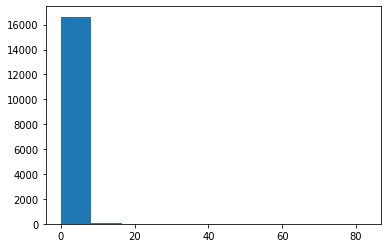

In [0]:
plt.hist(df['Global_Sales'])

(array([2.002e+03, 5.200e+01, 1.200e+01, 7.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1.   ,  9.153, 17.306, 25.459, 33.612, 41.765, 49.918, 58.071,
        66.224, 74.377, 82.53 ]),
 <a list of 10 Patch objects>)

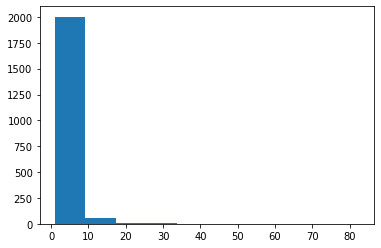

In [0]:
gb = df[df['Global_Sales'] >= 1.0]

plt.hist(gb['Global_Sales'])

In [0]:
len(gb)

2076

(array([168.,  21.,   9.,   8.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([ 5.   , 12.753, 20.506, 28.259, 36.012, 43.765, 51.518, 59.271,
        67.024, 74.777, 82.53 ]),
 <a list of 10 Patch objects>)

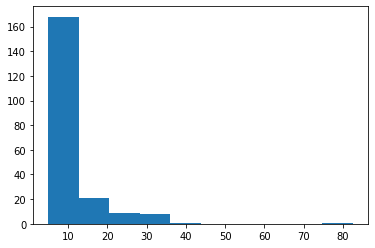

In [0]:
plt.hist(gb['Global_Sales'])

In [0]:
df.select_dtypes('object').apply(pd.Series.nunique, axis=0)

Name          11562
Platform         31
Genre            12
Publisher       581
User_Score       96
Developer      1696
Rating            8
dtype: int64

In [0]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [0]:
#checking percentage of nulls
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/ df.isnull().count()*100).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(15)

,Total,Percent
User_Count,9129,54.602548
Critic_Count,8582,51.330821
Critic_Score,8582,51.330821
Rating,6769,40.486871
User_Score,6704,40.098092
Developer,6623,39.613613
Year_of_Release,269,1.608948
Publisher,54,0.322986
Genre,2,0.011962
Name,2,0.011962


In [0]:
df[['Name','Genre']]

In [0]:
#excluding null Names and Null year_of_release, as it is a unclear whether they were actually released or if they had a wide-consumer release
test = df
test2 = test[test['Name'].notna()]
test3 = test2[test2['Year_of_Release'].notna()]

#not many rows were removed, so I feel it is okay to continue with investigation
test3.info()



# test3.isnull().sum()
# test.dropna(subset=['Name', 'Genre'])
# test.info()
# test.isnull().sum()

#Just to be sure, checking percentage of nulls again
total_t = test3.isnull().sum().sort_values(ascending=False)
percent_t = (test3.isnull().sum()/ test3.isnull().count()*100).sort_values(ascending=False)
missing_data_t = pd.concat([total_t, percent_t], axis = 1, keys = ['Total', 'Percent'])
missing_data_t.head(16)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16448 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16448 non-null  object 
 1   Platform         16448 non-null  object 
 2   Year_of_Release  16448 non-null  float64
 3   Genre            16448 non-null  object 
 4   Publisher        16416 non-null  object 
 5   NA_Sales         16448 non-null  float64
 6   EU_Sales         16448 non-null  float64
 7   JP_Sales         16448 non-null  float64
 8   Other_Sales      16448 non-null  float64
 9   Global_Sales     16448 non-null  float64
 10  Critic_Score     7983 non-null   float64
 11  Critic_Count     7983 non-null   float64
 12  User_Score       9840 non-null   object 
 13  User_Count       7463 non-null   float64
 14  Developer        9907 non-null   object 
 15  Rating           9769 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.1+ MB


,Total,Percent
User_Count,8985,54.626702
Critic_Count,8465,51.465224
Critic_Score,8465,51.465224
Rating,6679,40.606761
User_Score,6608,40.175097
Developer,6541,39.767753
Publisher,32,0.194553
Global_Sales,0,0.000000
Other_Sales,0,0.000000
JP_Sales,0,0.000000


In [0]:
q = test
q.dropna(subset=['User_Score'])
q.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [0]:
#Dropped all NA values after deliberating what to do.
# This decision came mainly from the fact that many games did not have User scores, which is what I am focusing on here.
test4 = test3.dropna()

#Still more than enough to perform necessary analysis
test4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   float64
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   float64
 12  User_Score       6825 non-null   object 
 13  User_Count       6825 non-null   float64
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
dtypes: float64(9), object(7)
memory usage: 906.4+ KB


In [0]:
#Quick check of correlations to get an idea what columns may be influencing others. However, here I noticed that User_Score was not included.
# Found out that User_Score was oddly an "object" instead of a float.
# I corrected this lower down 
test4.corr()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
Year_of_Release,1.000000,-0.016239,0.041346,-0.038443,0.042315,0.006661,-0.007661,0.203336,0.199348
NA_Sales,-0.016239,1.000000,0.841808,0.468607,0.726757,0.955793,0.233580,0.283917,0.246208
EU_Sales,0.041346,0.841808,1.000000,0.519929,0.716330,0.939313,0.213102,0.265740,0.283504
JP_Sales,-0.038443,0.468607,0.519929,1.000000,0.394823,0.613546,0.147314,0.168299,0.072773
Other_Sales,0.042315,0.726757,0.716330,0.394823,1.000000,0.804028,0.191509,0.239513,0.240085
Global_Sales,0.006661,0.955793,0.939313,0.613546,0.804028,1.000000,0.237556,0.290397,0.264151
Critic_Score,-0.007661,0.233580,0.213102,0.147314,0.191509,0.237556,1.000000,0.396478,0.265639
Critic_Count,0.203336,0.283917,0.265740,0.168299,0.239513,0.290397,0.396478,1.000000,0.365603
User_Count,0.199348,0.246208,0.283504,0.072773,0.240085,0.264151,0.265639,0.365603,1.000000


In [0]:
test4.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


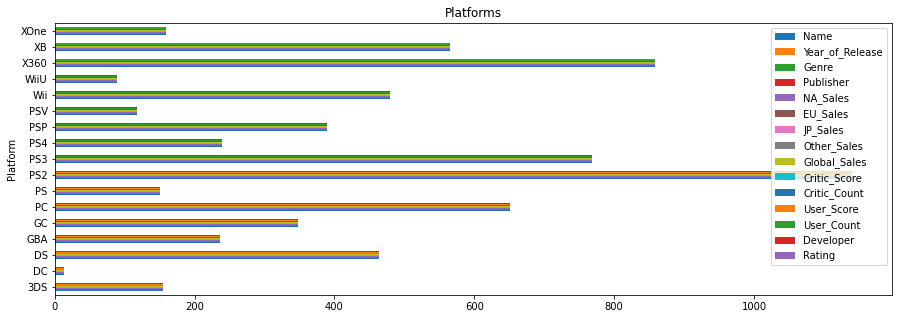

In [0]:
test4.groupby('Platform').count().plot(kind='barh', figsize=(15,5), title = 'Platforms')
plt.show()

In [0]:
#Aggregate ratings come from Metacritic and their reporting of how games are rated throughout all reviewing sites.



# critic_score6_7 = test4.loc[((test4['Critic_Score'] >= 60.0) & (test4['Critic_Score'] <= 70.0))]
# critic_score6_7['Global_Sales'].mean()

#Created a new column which converted the User_Score column as float
test4['User_Score_Float'] = test4['User_Score'].astype(float)

test4.dtypes

Name                 object
Platform             object
Year_of_Release     float64
Genre                object
Publisher            object
NA_Sales            float64
EU_Sales            float64
JP_Sales            float64
Other_Sales         float64
Global_Sales        float64
Critic_Score        float64
Critic_Count        float64
User_Score           object
User_Count          float64
Developer            object
Rating               object
User_Score_Float    float64
dtype: object

In [0]:
#Below, there were a few outliers of games that made more than one million. About 60 or 70 games made far, far more than any other game. 
#Thus, I got rid of them and we're only checking games that made 1 million or less. This still preserves most of the idea, it simply lops off the top 1% of games.
test4 = test4[test4['Global_Sales'] <= 1.0]

In [0]:
#practice
test4.loc[test4['User_Score_Float'] >= 6.0]

In [0]:
#Split the data into many different groups. This is to make the data more granular and also to follow reviewing conventions found on many websites
#Most websites will attribute a different adjective to each full 1.0 difference in score ('Masterpiece' for 9.0 or higher, 'Great' for 8.0 to 8.9, and on down )

us9_above = test4.loc[test4['User_Score_Float'] >= 9.0]
us8_9 = test4.loc[((test4['User_Score_Float'] >= 8.0) & (test4['User_Score_Float'] < 9.0))]
us7_8 = test4.loc[((test4['User_Score_Float'] >= 7.0) & (test4['User_Score_Float'] < 8.0))]
us6_7 = test4.loc[((test4['User_Score_Float'] >= 6.0) & (test4['User_Score_Float'] < 7.0))]
us5_6 = test4.loc[((test4['User_Score_Float'] >= 5.0) & (test4['User_Score_Float'] < 6.0))]
us5_below = test4.loc[test4['User_Score_Float'] < 5.0]



In [0]:
#I didn't want to cut the data too finely and thus included all the data in 5.0 or lower into one group. You'll see below that the group doesn't contain many games.
#So, I think it is okay for an analysis at this level.
print(us9_above.shape)
print(us8_9.shape)
print(us7_8.shape)
print(us6_7.shape)
print(us5_6.shape)
print(us5_below.shape)

(199, 18)
(1584, 18)
(1715, 18)
(979, 18)
(542, 18)
(499, 18)


In [0]:
#Checking scores to see how many different categories we have.
#5 and below contains a LOT, but again, that is an aggregate group so I think preserving that is okay.
print(us9_above['User_Score_Float'].unique())
print(us8_9['User_Score_Float'].unique())
print(us7_8['User_Score_Float'].unique())
print(us6_7['User_Score_Float'].unique())
print(us5_6['User_Score_Float'].unique())
print(us5_below['User_Score_Float'].unique())

[9.3 9.1 9.2 9.  9.4 9.6 9.5]
[8.  8.4 8.9 8.5 8.6 8.2 8.1 8.3 8.7 8.8]
[7.8 7.6 7.9 7.5 7.4 7.7 7.3 7.1 7.  7.2]
[6.6 6.5 6.8 6.2 6.4 6.9 6.7 6.1 6.3 6. ]
[5.  5.4 5.9 5.3 5.5 5.2 5.6 5.7 5.8 5.1]
[4.5 2.1 4.3 4.1 4.8 3.3 3.4 4.2 4.9 4.4 1.8 4.6 3.1 3.8 3.  4.7 4.  2.9
 3.6 3.7 3.9 2.8 1.7 3.2 3.5 2.7 2.4 2.  1.5 2.6 1.2 2.5 2.3 0.5 2.2 0.6
 0.9 1.  1.4 1.9 1.3 0.7]


In [0]:
#In order to carry out some other analysis I wanted to do below, I identified each sub-group and then put them back together into one df

us9_above['us_group'] = '9'
us8_9['us_group'] = '8'
us7_8['us_group'] = '7'
us6_7['us_group'] = '6'
us5_6['us_group'] = '5'
us5_below['us_group'] = '4'

In [0]:
df2 = pd.concat([us9_above,us8_9,us7_8,us6_7,us5_6,us5_below])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5518 entries, 2073 to 16667
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              5518 non-null   object 
 1   Platform          5518 non-null   object 
 2   Year_of_Release   5518 non-null   float64
 3   Genre             5518 non-null   object 
 4   Publisher         5518 non-null   object 
 5   NA_Sales          5518 non-null   float64
 6   EU_Sales          5518 non-null   float64
 7   JP_Sales          5518 non-null   float64
 8   Other_Sales       5518 non-null   float64
 9   Global_Sales      5518 non-null   float64
 10  Critic_Score      5518 non-null   float64
 11  Critic_Count      5518 non-null   float64
 12  User_Score        5518 non-null   object 
 13  User_Count        5518 non-null   float64
 14  Developer         5518 non-null   object 
 15  Rating            5518 non-null   object 
 16  User_Score_Float  5518 non-null   floa

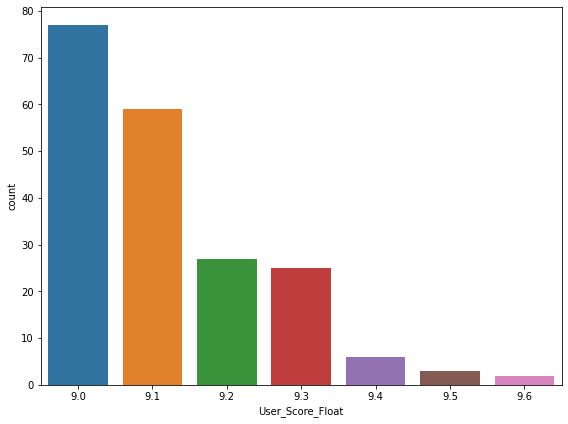

In [0]:
#This part is half me just playing with plots and another half of checking occurences of each user_score/global sale.
plt.figure(figsize=(8,6))
sns.countplot(x='User_Score_Float', data=us9_above, order=us9_above['User_Score_Float'].value_counts().index)
plt.title=('# of scores')
plt.tight_layout()
plt.show()

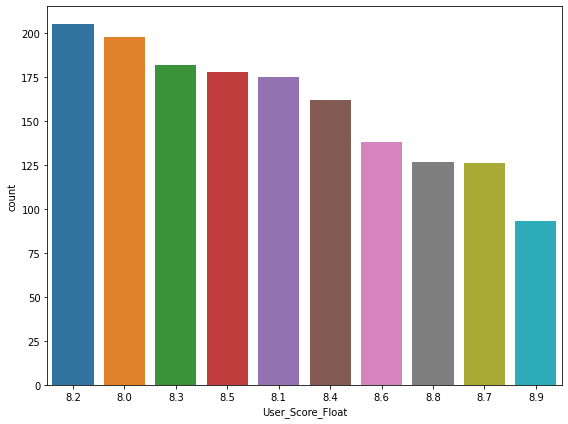

In [0]:
plt.figure(figsize=(8,6))
sns.countplot(x='User_Score_Float', data=us8_9, order=us8_9['User_Score_Float'].value_counts().index)
plt.title=('# of scores')
plt.tight_layout()
plt.show()

In [0]:
us9_above['User_Score_Float'].value_counts().index

Float64Index([9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6], dtype='float64')

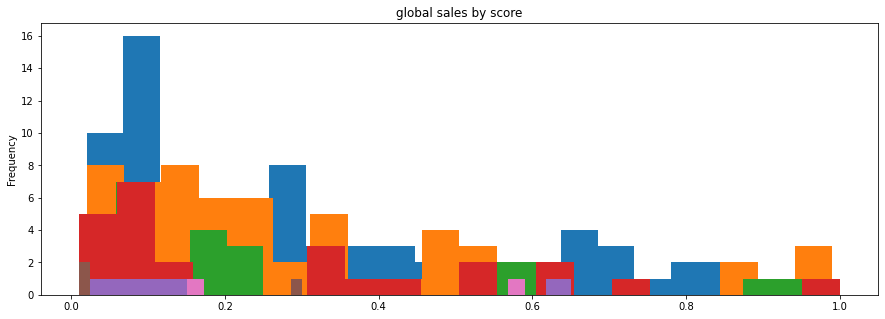

In [0]:
us9_above.groupby('User_Score_Float')['Global_Sales'] \
  .plot(kind ='hist',
          bins = 20,
        figsize=(15,5),
        title='global sales by score')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f898622c4a8>,
      dtype=object)

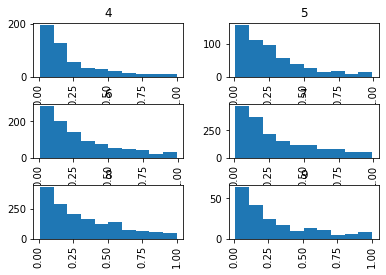

In [0]:
#These don't look very normal just from eyeballing. Just to be sure I wasn't doing something wrong, I did individual histograms just to be 100% sure I was doing it right.
# df2['User_Score_Float'].hist(by=df2['Global_Sales'])
df2['Global_Sales'].hist(by=df2['us_group'])

(array([64., 42., 24., 17., 10., 13., 11.,  4.,  6.,  8.]),
 array([0.01 , 0.109, 0.208, 0.307, 0.406, 0.505, 0.604, 0.703, 0.802,
        0.901, 1.   ]),
 <a list of 10 Patch objects>)

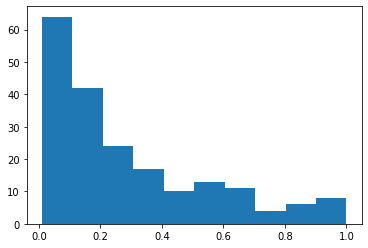

In [0]:
plt.hist(us9_above['Global_Sales'])

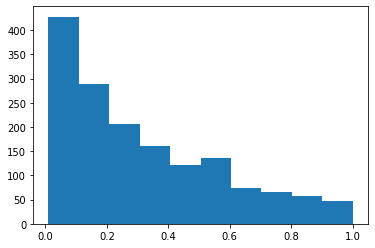

In [0]:
plt.hist(us8_9['Global_Sales'])
plt.show()

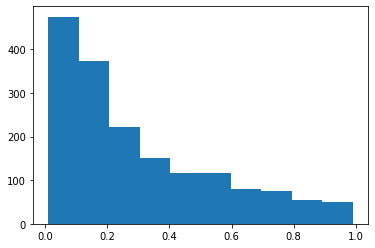

In [0]:
plt.hist(us7_8['Global_Sales'])
plt.show()

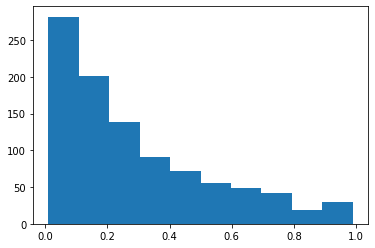

In [0]:
plt.hist(us6_7['Global_Sales'])
plt.show()

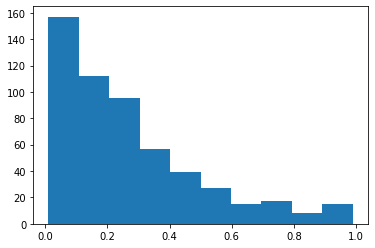

In [0]:
plt.hist(us5_6['Global_Sales'])
plt.show()

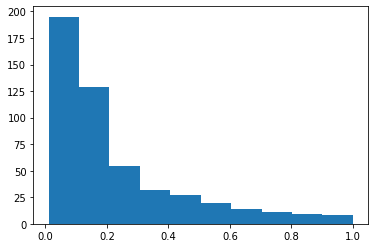

In [0]:
plt.hist(us5_below['Global_Sales'])
plt.show()

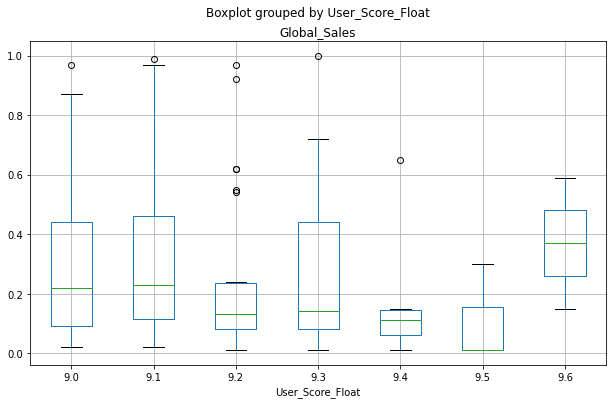

In [0]:
#Just a selection, I didn't want to over-plot anything else. It was taking a lot of time.

us9_above.boxplot('Global_Sales', by='User_Score_Float', figsize=(10,6))

In [0]:
#Just from checking skewness and kurtosis, but we have non-normal data (which was expected from how it looks)
#Kurtosis is within bounds for half the groups, but all of them have far too much skewness. Again, expected.

print(stats.describe(us9_above['Global_Sales']))
print(stats.describe(us8_9['Global_Sales']))
print(stats.describe(us7_8['Global_Sales']))
print(stats.describe(us6_7['Global_Sales']))
print(stats.describe(us5_6['Global_Sales']))
print(stats.describe(us5_below['Global_Sales']))

DescribeResult(nobs=199, minmax=(0.01, 1.0), mean=0.28613065326633164, variance=0.06753495254048018, skewness=1.121723520544446, kurtosis=0.2966275369942766)
DescribeResult(nobs=1584, minmax=(0.01, 1.0), mean=0.3140277777777778, variance=0.06706273075033341, skewness=0.8598592859173049, kurtosis=-0.24525856075799535)
DescribeResult(nobs=1715, minmax=(0.01, 0.99), mean=0.29618658892128275, variance=0.0638686466111699, skewness=0.9659130515206963, kurtosis=-0.07580803036722061)
DescribeResult(nobs=979, minmax=(0.01, 0.99), mean=0.28697650663942803, variance=0.06097571621641381, skewness=1.0344339948876664, kurtosis=0.1862109169174655)
DescribeResult(nobs=542, minmax=(0.01, 0.99), mean=0.26845018450184505, variance=0.05209519067464242, skewness=1.2344068166559494, kurtosis=0.9643145950950549)
DescribeResult(nobs=499, minmax=(0.01, 1.0), mean=0.22006012024048097, variance=0.048196984330105996, skewness=1.5814052352984058, kurtosis=1.9086978589222268)


In [0]:
#From this finding, we can see that there is indeed a significant difference of how user ratings can impact how games sell.

#However, there are a lot of groups and it would be nice to know what exactly is affecting what.
print(stats.kruskal(us9_above['Global_Sales'], us8_9['Global_Sales'], us7_8['Global_Sales'], us6_7['Global_Sales'], us5_6['Global_Sales'], us5_below['Global_Sales']))

KruskalResult(statistic=61.81551965179066, pvalue=5.120319699182765e-12)


In [0]:
#Some of the lower groups have quite a large distribution, so if we start to shave down those lower groups and focus on higher user-scored games,
# we start to get much less significant results

print(stats.kruskal(us9_above['Global_Sales'], us8_9['Global_Sales'], us7_8['Global_Sales'], us6_7['Global_Sales'], us5_6['Global_Sales']))
print(stats.kruskal(us9_above['Global_Sales'], us8_9['Global_Sales'], us7_8['Global_Sales'], us6_7['Global_Sales']))
print(stats.kruskal(us9_above['Global_Sales'], us8_9['Global_Sales'], us7_8['Global_Sales']))

#Essentially, what we're seeing here is, the higher the user-score becomes, the less likely it is to be an indicator of how much it makes

KruskalResult(statistic=11.787375775364747, pvalue=0.019004458040076576)
KruskalResult(statistic=7.9928614408484, pvalue=0.04615946879769267)
KruskalResult(statistic=5.312104924650889, pvalue=0.07022489070655698)


In [0]:
# This may be not be correct and frowned upon, but I went ahead and did a parametric test (Tukeys) to test this.
# It may be from laziness, but I didn't want to do a lot of one-to-one Kruskal-Wallis's

from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukeys = pairwise_tukeyhsd(endog = df2['Global_Sales'],
                          groups = df2['us_group'])

tukeys.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
4,5,0.0484,0.0213,0.0044,0.0924,True
4,6,0.0669,0.001,0.0279,0.1059,True
4,7,0.0761,0.001,0.0401,0.1122,True
4,8,0.094,0.001,0.0576,0.1304,True
4,9,0.0661,0.0192,0.0066,0.1255,True
5,6,0.0185,0.7052,-0.0194,0.0565,False
5,7,0.0277,0.2093,-0.0072,0.0627,False
5,8,0.0456,0.0032,0.0103,0.0809,True
5,9,0.0177,0.9,-0.0411,0.0764,False
6,7,0.0092,0.9,-0.0192,0.0376,False


In [0]:
#more practicing

from scipy.stats import friedmanchisquare

f = friedmanchisquare(us9_above['Global_Sales'], us8_9['Global_Sales'], us7_8['Global_Sales'], us6_7['Global_Sales'], us5_6['Global_Sales'], us5_below['Global_Sales'])
print(f)

In [0]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


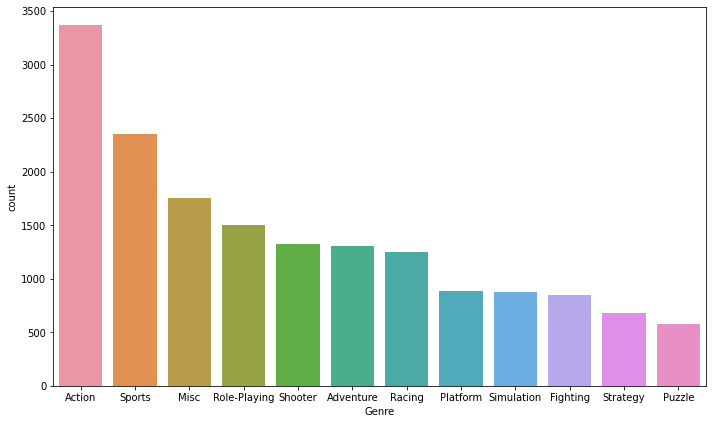

In [0]:
plt.figure(figsize=(10,6))
sns.countplot(x='Genre', data=df, order=df['Genre'].value_counts().index)
plt.title=('# of games')
plt.tight_layout()
plt.show()

In [0]:
dff = df

dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [0]:
dff2 = dff[dff['User_Count'].notna()]

dff2.info()

dff2[dff2['Critic_Score'].isnull()]

dff2['US_Float'] = dff2['User_Score'].astype(float)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7590 entries, 0 to 16709
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             7590 non-null   object 
 1   Platform         7590 non-null   object 
 2   Year_of_Release  7463 non-null   float64
 3   Genre            7590 non-null   object 
 4   Publisher        7584 non-null   object 
 5   NA_Sales         7590 non-null   float64
 6   EU_Sales         7590 non-null   float64
 7   JP_Sales         7590 non-null   float64
 8   Other_Sales      7590 non-null   float64
 9   Global_Sales     7590 non-null   float64
 10  Critic_Score     7017 non-null   float64
 11  Critic_Count     7017 non-null   float64
 12  User_Score       7590 non-null   object 
 13  User_Count       7590 non-null   float64
 14  Developer        7579 non-null   object 
 15  Rating           7504 non-null   object 
dtypes: float64(9), object(7)
memory usage: 1008.0+ KB


In [0]:
# dff2['User_Score_Group'] = pd.cut(x=dff2['US_Float'], bins=[0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10])
dff2['User_Score_Group'] = pd.cut(x=dff2['US_Float'], bins=[0, 0.9, 1.9, 2.9, 3.9, 4.9, 5.9, 6.9, 7.9, 8.9, 10], labels= ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9 and above'])

In [0]:
dff2[dff2['US_Float'] == 8.0]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,US_Float,User_Score_Group
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E,8.0,8
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E,8.0,8
103,Just Dance,Wii,2009.0,Misc,Ubisoft,3.48,2.99,0.00,0.73,7.20,49.0,21.0,8,110.0,Ubisoft Paris,E10+,8.0,8
161,Forza Motorsport 3,X360,2009.0,Racing,Microsoft Game Studios,2.99,1.90,0.10,0.50,5.49,92.0,90.0,8,516.0,Turn 10,E,8.0,8
200,The Legend of Zelda: Phantom Hourglass,DS,2007.0,Action,Nintendo,1.85,1.80,0.95,0.48,5.08,90.0,57.0,8,416.0,Nintendo,E,8.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16377,Dokuro,PSV,2012.0,Action,GungHo,0.00,0.00,0.01,0.00,0.01,76.0,26.0,8,18.0,Game Arts,E10+,8.0,8
16410,The Chronicles of Riddick: Assault on Dark Athena,PC,2009.0,Shooter,Vivendi Games,0.00,0.01,0.00,0.00,0.01,80.0,26.0,8,136.0,Starbreeze,M,8.0,8
16549,Madagascar: Escape 2 Africa,PC,2008.0,Action,Activision,0.01,0.00,0.00,0.00,0.01,58.0,6.0,8,4.0,Aspyr,E10+,8.0,8
16569,Egg Mania: Eggstreme Madness,GC,2002.0,Puzzle,Kemco,0.01,0.00,0.00,0.00,0.01,64.0,7.0,8,4.0,Kemco,E,8.0,8


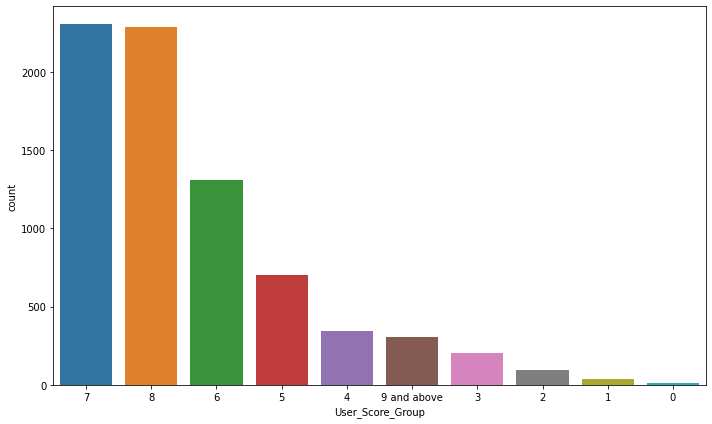

In [0]:
plt.figure(figsize=(10,6))
sns.countplot(x='User_Score_Group', data=dff2, order=dff2['User_Score_Group'].value_counts().index)
plt.title=('# of User Scores by Group')
plt.tight_layout()
plt.show()

In [0]:
# ANALYSIS OF YEAR OF RELEASE AND SALES BY REGION
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Name              16717 non-null  object  
 1   Platform          16719 non-null  object  
 2   Year_of_Release   16450 non-null  float64 
 3   Genre             16717 non-null  object  
 4   Publisher         16665 non-null  object  
 5   NA_Sales          16719 non-null  float64 
 6   EU_Sales          16719 non-null  float64 
 7   JP_Sales          16719 non-null  float64 
 8   Other_Sales       16719 non-null  float64 
 9   Global_Sales      16719 non-null  float64 
 10  Critic_Score      8137 non-null   float64 
 11  Critic_Count      8137 non-null   float64 
 12  User_Score        10015 non-null  object  
 13  User_Count        7590 non-null   float64 
 14  Developer         10096 non-null  object  
 15  Rating            9950 non-null   object  
 16  five_year_period  1644

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,five_year_period
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E,2005-2009
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN,1985-1989
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,2005-2009
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E,2005-2009
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN,1995-1999


In [0]:
df.isnull().sum()

Name                   2
Platform               0
Year_of_Release      269
Genre                  2
Publisher             54
NA_Sales               0
EU_Sales               0
JP_Sales               0
Other_Sales            0
Global_Sales           0
Critic_Score        8582
Critic_Count        8582
User_Score          6704
User_Count          9129
Developer           6623
Rating              6769
five_year_period     273
dtype: int64

In [0]:
dff3 = df[df['Year_of_Release'].notna()]

In [0]:
dff3.isnull().sum()

Name                   2
Platform               0
Year_of_Release        0
Genre                  2
Publisher             32
NA_Sales               0
EU_Sales               0
JP_Sales               0
Other_Sales            0
Global_Sales           0
Critic_Score        8467
Critic_Count        8467
User_Score          6610
User_Count          8987
Developer           6543
Rating              6681
five_year_period       4
dtype: int64

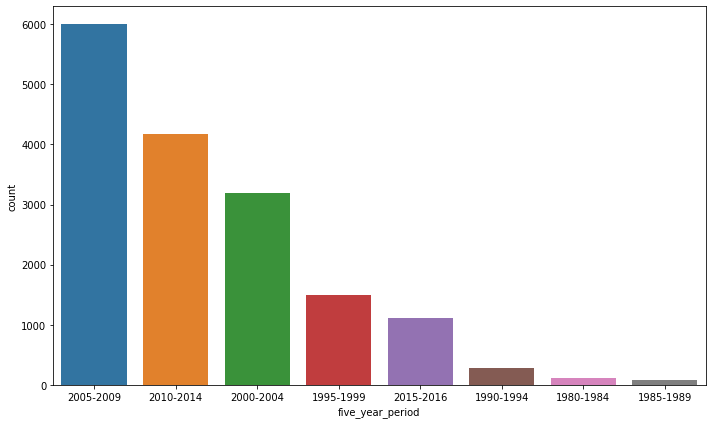

In [0]:
plt.figure(figsize=(10,6))
sns.countplot(x='five_year_period', data=dff3, order=dff3['five_year_period'].value_counts().index)
plt.title=('# of games logged by 5 year period')
plt.tight_layout()
plt.show()

In [0]:
dff4 = dff3[(dff3['Global_Sales'] > .1) & (dff3['Global_Sales'] <= 1.0)]
df1980 = dff4[dff4['five_year_period'] == '1980-1984']
df1980.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 2131 to 9488
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Name              82 non-null     object  
 1   Platform          82 non-null     object  
 2   Year_of_Release   82 non-null     float64 
 3   Genre             82 non-null     object  
 4   Publisher         82 non-null     object  
 5   NA_Sales          82 non-null     float64 
 6   EU_Sales          82 non-null     float64 
 7   JP_Sales          82 non-null     float64 
 8   Other_Sales       82 non-null     float64 
 9   Global_Sales      82 non-null     float64 
 10  Critic_Score      0 non-null      float64 
 11  Critic_Count      0 non-null      float64 
 12  User_Score        0 non-null      object  
 13  User_Count        0 non-null      float64 
 14  Developer         0 non-null      object  
 15  Rating            0 non-null      object  
 16  five_year_period  82 no

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8b723e1518>,
      dtype=object)

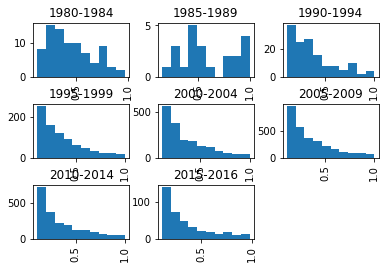

In [0]:
#how would one continue with statistical analysis here? Some data is normally distributed while other is not

dff4['Global_Sales'].hist(by=dff4['five_year_period'])

In [0]:
df1980['Global_Sales'].unique()
df1980 = df1980[((df1980['Global_Sales'] <= 1.0) & (df1980['Global_Sales'] > .10))]

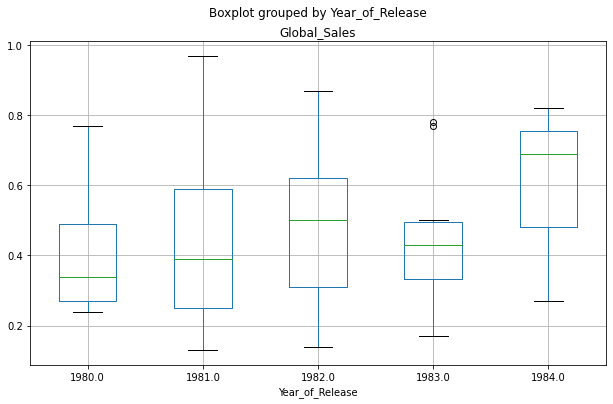

In [0]:
df1980.boxplot('Global_Sales', by='Year_of_Release', figsize=(10,6))

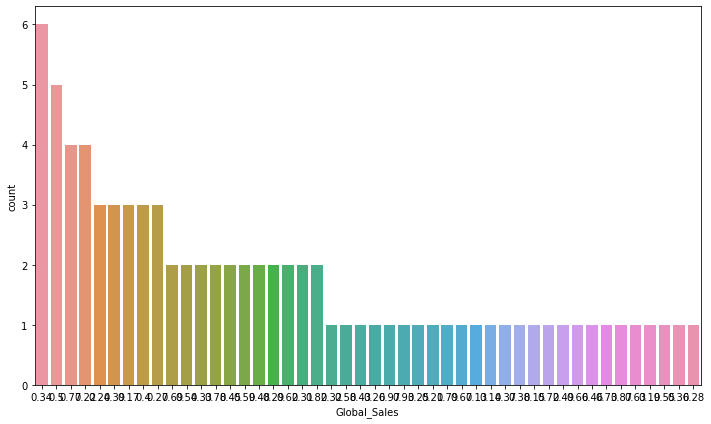

In [0]:
plt.figure(figsize=(10,6))
sns.countplot(x='Global_Sales', data=df1980, order=df1980['Global_Sales'].value_counts().index)
plt.title=('# of games logged by 5 year period')
plt.tight_layout()
plt.show()

DescribeResult(nobs=82, minmax=(0.13, 0.97), mean=0.4540243902439025, variance=0.0454564438422162, skewness=0.5250540667390836, kurtosis=-0.7305281487658171)

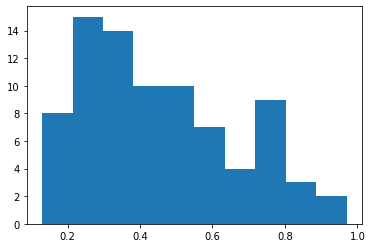

In [0]:
plt.hist(df1980['Global_Sales'])
stats.describe(df1980['Global_Sales'])

In [0]:
stats.describe(dff4['Global_Sales'])

#global sales as a whole is still exhibiting too much skewness, however only 1980-1984 is normal

DescribeResult(nobs=8216, minmax=(0.11, 1.0), mean=0.34978091528724436, variance=0.05011832083353829, skewness=1.0574809475041764, kurtosis=0.2339639665489237)

In [0]:
#ANALYSIS OF GENRE BY SALES IN REGIONS
df.isnull().sum()

Name                   2
Platform               0
Year_of_Release      269
Genre                  2
Publisher             54
NA_Sales               0
EU_Sales               0
JP_Sales               0
Other_Sales            0
Global_Sales           0
Critic_Score        8582
Critic_Count        8582
User_Score          6704
User_Count          9129
Developer           6623
Rating              6769
five_year_period     273
dtype: int64

In [0]:
nogull = df[df['Genre'].notna()]

In [0]:
nogull.isnull().sum()

Name                   0
Platform               0
Year_of_Release      269
Genre                  0
Publisher             54
NA_Sales               0
EU_Sales               0
JP_Sales               0
Other_Sales            0
Global_Sales           0
Critic_Score        8580
Critic_Count        8580
User_Score          6702
User_Count          9127
Developer           6621
Rating              6767
five_year_period     273
dtype: int64

In [0]:
noyear = nogull[nogull['five_year_period'].notna()]
regionsales = noyear[((noyear['Global_Sales'] <= 1.0) & (noyear['Global_Sales'] > .10))]
regionsales.info()
regionsales.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8215 entries, 2057 to 10411
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Name              8215 non-null   object  
 1   Platform          8215 non-null   object  
 2   Year_of_Release   8215 non-null   float64 
 3   Genre             8215 non-null   object  
 4   Publisher         8192 non-null   object  
 5   NA_Sales          8215 non-null   float64 
 6   EU_Sales          8215 non-null   float64 
 7   JP_Sales          8215 non-null   float64 
 8   Other_Sales       8215 non-null   float64 
 9   Global_Sales      8215 non-null   float64 
 10  Critic_Score      4463 non-null   float64 
 11  Critic_Count      4463 non-null   float64 
 12  User_Score        5416 non-null   object  
 13  User_Count        4262 non-null   float64 
 14  Developer         5430 non-null   object  
 15  Rating            5394 non-null   object  
 16  five_year_period  82

Name                   0
Platform               0
Year_of_Release        0
Genre                  0
Publisher             23
NA_Sales               0
EU_Sales               0
JP_Sales               0
Other_Sales            0
Global_Sales           0
Critic_Score        3752
Critic_Count        3752
User_Score          2799
User_Count          3953
Developer           2785
Rating              2821
five_year_period       0
dtype: int64

In [0]:
print(regionsales['NA_Sales'].unique())
print(regionsales['EU_Sales'].unique())
print(regionsales['JP_Sales'].unique())
print(regionsales['Other_Sales'].unique())

[0.49 0.29 0.93 0.41 0.3  0.65 0.63 0.   0.78 0.13 0.08 0.56 0.55 0.33
 0.74 0.72 0.94 0.77 0.48 0.27 0.73 0.76 0.35 0.28 0.37 0.64 0.61 0.16
 0.52 0.02 0.58 0.23 0.5  0.62 0.86 0.38 0.53 0.57 0.88 0.85 0.89 0.09
 0.47 0.4  0.59 0.9  0.75 0.54 0.22 0.36 0.44 0.32 0.25 0.26 0.8  0.46
 0.84 0.67 0.39 0.03 0.24 0.68 0.79 0.01 0.69 0.34 0.7  0.1  0.19 0.51
 0.87 0.81 0.71 0.45 0.42 0.17 0.83 0.43 0.12 0.6  0.66 0.82 0.18 0.21
 0.15 0.2  0.11 0.14 0.31 0.06 0.07 0.05 0.04]
[0.38 0.19 0.   0.35 0.24 0.14 0.25 0.15 0.1  0.18 0.76 0.9  0.49 0.21
 0.17 0.2  0.06 0.33 0.23 0.52 0.04 0.3  0.27 0.29 0.78 0.53 0.31 0.32
 0.64 0.88 0.13 0.03 0.5  0.26 0.02 0.93 0.01 0.37 0.6  0.44 0.34 0.05
 0.62 0.41 0.36 0.22 0.81 0.4  0.28 0.56 0.43 0.54 0.45 0.46 0.71 0.16
 0.39 0.07 0.09 0.08 0.42 0.57 0.51 0.83 0.8  0.11 0.68 0.47 0.79 0.59
 0.12 0.72 0.65 0.58 0.77 0.48 0.66 0.67 0.55 0.69]
[0.   0.46 0.03 0.38 0.21 0.09 0.19 0.47 1.   0.02 0.74 0.01 0.41 0.04
 0.64 0.12 0.15 0.45 0.28 0.05 0.29 0.86 0.97 0.2

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8b71e254e0>,
      dtype=object)

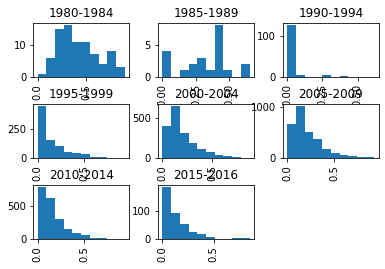

In [0]:
regionsales['NA_Sales'].hist(by=regionsales['five_year_period'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8b71ea4e48>,
      dtype=object)

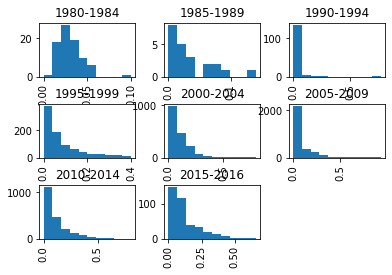

In [0]:
regionsales['EU_Sales'].hist(by=regionsales['five_year_period'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8b719d4f98>,
      dtype=object)

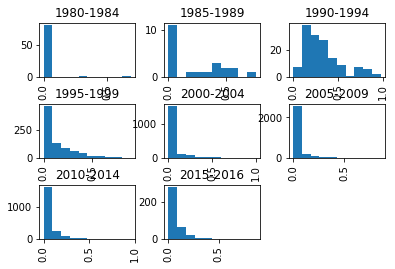

In [0]:
regionsales['JP_Sales'].hist(by=regionsales['five_year_period'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8b716c96a0>,
      dtype=object)

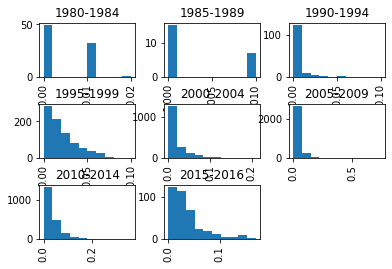

In [0]:
regionsales['Other_Sales'].hist(by=regionsales['five_year_period'])

In [0]:
print(stats.describe(regionsales['NA_Sales']))
print(stats.describe(regionsales['JP_Sales']))
print(stats.describe(regionsales['EU_Sales']))
print(stats.describe(regionsales['Other_Sales']))

DescribeResult(nobs=8215, minmax=(0.0, 0.94), mean=0.17758855751673766, variance=0.02535426458782647, skewness=1.3309458858257817, kurtosis=2.0056191825439402)
DescribeResult(nobs=8215, minmax=(0.0, 1.0), mean=0.0575362142422398, variance=0.01593076856297333, skewness=3.010335232592764, kurtosis=10.74335902006008)
DescribeResult(nobs=8215, minmax=(0.0, 0.93), mean=0.08508338405356057, variance=0.011232690270504423, skewness=2.1243552766847476, kurtosis=6.617447075403744)
DescribeResult(nobs=8215, minmax=(0.0, 0.74), mean=0.029474132684114432, variance=0.001578272248988967, skewness=5.057346803162371, kurtosis=50.404173957359646)


In [0]:
stats.kruskal(regionsales['NA_Sales'], regionsales['JP_Sales'], regionsales['EU_Sales'], regionsales['Other_Sales'])

KruskalResult(statistic=7273.619145402728, pvalue=0.0)

In [0]:
regionsales['NA_Sales'].hist()